In [2]:

!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda

In [3]:
from datasets import load_dataset
import pandas as pd

In [10]:
ds1 = load_dataset("shmuhammad/AfriSenti-twitter-sentiment", "ary")
type(ds1)

0000.parquet:   0%|          | 0.00/450k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/42.5k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/220k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5583 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/494 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2961 [00:00<?, ? examples/s]

datasets.dataset_dict.DatasetDict

In [11]:
ds1.align_labels_with_mapping

<bound method DatasetDict.align_labels_with_mapping of DatasetDict({
    train: Dataset({
        features: ['tweet', 'label'],
        num_rows: 5583
    })
    validation: Dataset({
        features: ['tweet', 'label'],
        num_rows: 494
    })
    test: Dataset({
        features: ['tweet', 'label'],
        num_rows: 2961
    })
})>

In [12]:
ds1.keys()

dict_keys(['train', 'validation', 'test'])

In [13]:
dataframes = {split: pd.DataFrame(ds1[split]) for split in ds1.keys()}

# Access individual DataFrames
train_df = dataframes['train']
validation_df = dataframes.get('validation')  # Using get() in case it doesn't exist
test_df = dataframes.get('test')

In [14]:
train_df

,tweet,label
0,hhhhhhhhhhhhhhhhhhhhhh ana ga3ma sma3tt ach ka...,1
1,hhhh hardart jomhorha la fi3lan kadahko lach m...,1
2,: أتفهم العثماني وأتفهم الجدل الشعبي. الحل: حا...,1
3,كان افظل حاكم عربي',0
4,ماريانو راخوي : خاص المغرب واسبانيا يشرحو للرأ...,1
...,...,...
5578,wah akhouya titiz o dikchi 3la 9ad lhal,1
5579,soukaina dik nhar drt follow haydato o 9lt f k...,1
5580,kiban liya stormy kid7ak mn hna ana,1
5581,woww ghadi tefra7 bzzf thank uu aaliaaa,0


In [16]:
# Save the new splits
train_df.to_csv("train.csv", index=False)
validation_df.to_csv("validation.csv", index=False)
test_df.to_csv("test.csv", index=False)

In [ ]:
train_df['label'].value_counts()   ## 0: pos, 1: neutre, 2: neg

,count
label,
2,892
0,417
1,342


In [ ]:
import re

def clean_tweet(text):
    if pd.isna(text):  # Handle NaN values
        return ""
    text = str(text)  # Ensure it's a string
    text = re.sub(r"http\S+|www\S+", "", text)  # remove URLs
    text = re.sub(r"@\w+", "", text)            # remove mentions
    text = re.sub(r"#(\w+)", r"\1", text)       # remove hashtags but keep word
    text = re.sub(r"\d+", "", text)             # remove digits
    text = re.sub(r"\s+", " ", text).strip()    # remove extra spaces
    return text

# Apply cleaning using the correct column name 'tweet'
train_df['clean_text'] = train_df['tweet'].apply(clean_tweet)
validation_df['clean_text'] = validation_df['tweet'].apply(clean_tweet)
test_df['clean_text'] = test_df['tweet'].apply(clean_tweet)

print("Cleaning completed!")
print(f"Train set: {len(train_df)} samples")
print(f"Validation set: {len(validation_df)} samples")
print(f"Test set: {len(test_df)} samples")

# Check the results
print("\nExample of original vs cleaned text:")
for i in range(3):
    print(f"Original: {train_df.iloc[i]['tweet']}")
    print(f"Cleaned:  {train_df.iloc[i]['clean_text']}")
    print(f"Label:    {train_df.iloc[i]['label']}")
    print("-" * 50)

Cleaning completed!
Train set: 1651 samples
Validation set: 414 samples
Test set: 958 samples

Example of original vs cleaned text:
Original: @user على حسب موقعك يبدو أنك صاحب نظرة ثاقبة .يخي تبهليل . @user
Cleaned:  على حسب موقعك يبدو أنك صاحب نظرة ثاقبة .يخي تبهليل .
Label:    2
--------------------------------------------------
Original: @user تبهليل هاذا
Cleaned:  تبهليل هاذا
Label:    2
--------------------------------------------------
Original: @user هاذي تبهليل ماشي فهامة
Cleaned:  هاذي تبهليل ماشي فهامة
Label:    2
--------------------------------------------------


In [ ]:
label_mapping = {0: 'positive', 1: 'neutral', 2: 'negative'}
train_df['label_text'] = train_df['label'].map(label_mapping)

print("\nLabel distribution with names:")
print(train_df['label_text'].value_counts())




Label distribution with names:
label_text
negative    892
positive    417
neutral     342
Name: count, dtype: int64


In [ ]:
# # Define the mapping if you have label names
# label_map = {0: 'positive', 1: 'neutral', 2: 'negative'}

# # Filter minority classes (positive=0, neutral=1)
# minority_df = train_df[train_df['label'].isin([0, 1])]
# target_count = train_df['label'].value_counts().max()

# augmented_rows = []

# from deep_translator import GoogleTranslator
# import time

# def back_translate(text, src='ar', mid='fr'):
#     try:
#         fr = GoogleTranslator(source=src, target=mid).translate(text)
#         time.sleep(1)
#         back = GoogleTranslator(source=mid, target=src).translate(fr)
#         time.sleep(1)
#         return back
#     except Exception as e:
#         print(f"Error: {e}")
#         return text

# for label in [0, 1]:
#     subset = minority_df[minority_df['label'] == label]
#     needed = target_count - len(subset)
#     print(f"Augmenting class {label_map[label]} with {needed} examples...")

#     i = 0
#     while i < needed:
#         row = subset.iloc[i % len(subset)]
#         text = row['clean_text']
#         aug_text = back_translate(text)

#         # Fixed: Match the original DataFrame structure
#         augmented_rows.append({
#             'tweet': aug_text,        # ← Use 'tweet' to match original
#             'clean_text': aug_text,
#             'label': row['label'],
#             'label_text': label_map[label]  # ← Use 'label_text' to match original
#         })
#         i += 1

# # Create augmented DataFrame and combine
# import pandas as pd

# aug_df = pd.DataFrame(augmented_rows)
# balanced_train_df = pd.concat([train_df, aug_df], ignore_index=True).sample(frac=1).reset_index(drop=True)

# # Verify the structure
# print("Original DataFrame columns:", train_df.columns.tolist())
# print("Augmented DataFrame columns:", aug_df.columns.tolist())
# print("Combined DataFrame columns:", balanced_train_df.columns.tolist())

# # Check class distribution
# print("\nClass distribution after augmentation:")
# print(balanced_train_df['label'].value_counts().sort_index())

# # Update train_df
# train_df = balanced_train_df

Augmenting class positive with 475 examples...
Error: الله يعطيهم الصحه والعافيه يارب العالمين --> No translation was found using the current translator. Try another translator?
Error: نو نو ختيتو كرامتي فوق كل الحب \nشكون ما يبغني ما نبغية \nما نكسرو قاع pont.. 💪 --> No translation was found using the current translator. Try another translator?
Error: Chaouia est le choix des gens \ n Mai, et Dieu ne connaît pas une lettre, et il n'y a pas de mot de leur ton --> No translation was found using the current translator. Try another translator?
Error: اللهم آمين يارب 🤲\nايه قاتلي ختي واقيل من بحر ولاكليم --> No translation was found using the current translator. Try another translator?
Error: Request exception can happen due to an api connection error. Please check your connection and try again
Augmenting class neutral with 550 examples...
Original DataFrame columns: ['tweet', 'label', 'clean_text', 'label_text']
Augmented DataFrame columns: ['tweet', 'clean_text', 'label', 'label_text']
C

In [ ]:
train_df['label_text'].value_counts()


,count
label_text,
negative,892
positive,417
neutral,342


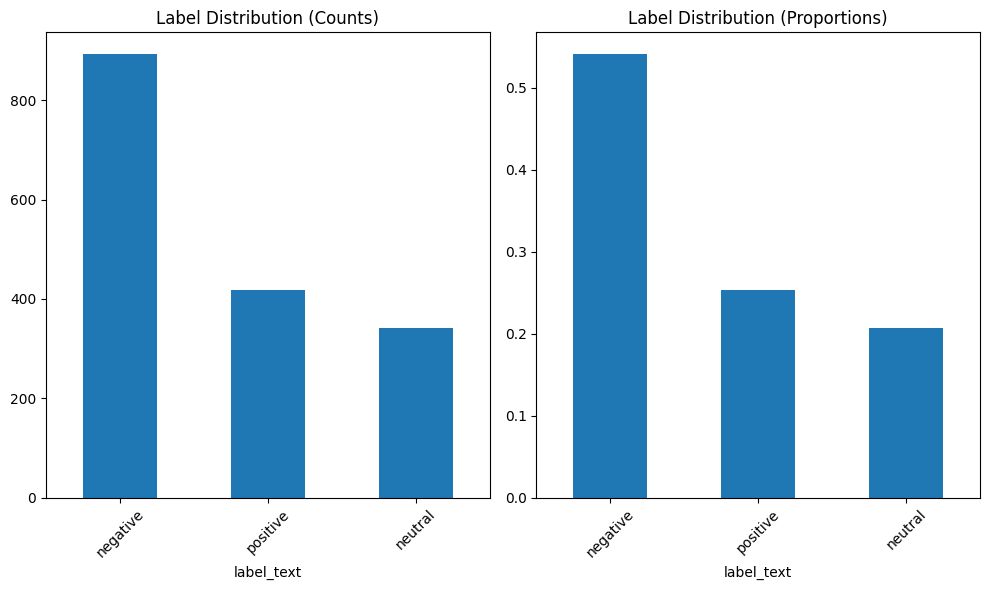


Validation set distribution:
label
0    105
1     86
2    223
Name: count, dtype: int64

Test set distribution:
label
0    329
1    154
2    475
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the imbalance
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
train_df['label_text'].value_counts().plot(kind='bar')
plt.title('Label Distribution (Counts)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
train_df['label_text'].value_counts(normalize=True).plot(kind='bar')
plt.title('Label Distribution (Proportions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check validation and test distributions too
if validation_df is not None:
    print("\nValidation set distribution:")
    print(validation_df['label'].value_counts().sort_index())

if test_df is not None:
    print("\nTest set distribution:")
    print(test_df['label'].value_counts().sort_index())

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights for imbalanced learning
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(train_df['label']),
    y=train_df['label']
)

class_weight_dict = dict(zip(np.unique(train_df['label']), class_weights))
print("Class weights for balanced training:")
print(class_weight_dict)


Class weights for balanced training:
{np.int64(0): np.float64(1.058589306029579), np.int64(1): np.float64(0.8611753817677001), np.int64(2): np.float64(1.1183894230769231)}


In [ ]:
# Text length analysis
train_df['text_length'] = train_df['clean_text'].str.len()
train_df['word_count'] = train_df['clean_text'].str.split().str.len()

print("Text statistics:")
print(train_df[['text_length', 'word_count']].describe())

# Remove very short texts (less than 3 characters)
print(f"Removing {len(train_df[train_df['text_length'] < 3])} very short texts")
train_df = train_df[train_df['text_length'] >= 3].reset_index(drop=True)

# Check for empty texts after cleaning
empty_texts = train_df[train_df['clean_text'].str.strip() == '']
print(f"Found {len(empty_texts)} empty texts after cleaning")

if len(empty_texts) > 0:
    print("Removing empty texts...")
    train_df = train_df[train_df['clean_text'].str.strip() != ''].reset_index(drop=True)

print(f"Final training set size: {len(train_df)}")
print("Final label distribution:")
print(train_df['label'].value_counts().sort_index())

Text statistics:
       text_length   word_count
count  5583.000000  5583.000000
mean     74.162995    13.005732
std      42.195884     7.280304
min       4.000000     1.000000
25%      42.000000     8.000000
50%      70.000000    12.000000
75%     100.000000    17.000000
max     771.000000   119.000000
Removing 0 very short texts
Found 0 empty texts after cleaning
Final training set size: 5583
Final label distribution:
label
0    1758
1    2161
2    1664
Name: count, dtype: int64


In [ ]:
try:
    X_train = train_df['clean_text'].values
    y_train = train_df['label'].values
    print(f"✓ Training data loaded: {len(X_train)} samples")

    # Handle validation data
    if 'validation_df' in globals() and validation_df is not None:
        X_val = validation_df['clean_text'].values
        y_val = validation_df['label'].values
        print(f"✓ Validation data loaded: {len(X_val)} samples")
    else:
        # Split training data if no validation set
        print("⚠ No validation set found. Splitting training data...")
        X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
        )
        print(f"✓ Data split - Training: {len(X_train)}, Validation: {len(X_val)}")

    # Handle test data
    if 'test_df' in globals() and test_df is not None:
        X_test = test_df['clean_text'].values
        y_test = test_df['label'].values
        print(f"✓ Test data loaded: {len(X_test)} samples")
    else:
        print("⚠ No test set provided")
        X_test, y_test = None, None

except NameError:
    print("❌ Error: Data not found. Please ensure you have:")
    print("- train_df with 'clean_text' and 'label' columns")
    print("- validation_df (optional)")
    print("- test_df (optional)")
    raise

# Analyze label distribution
unique_labels = np.unique(y_train)
num_labels = len(unique_labels)
print(f"\n📊 Dataset Analysis:")
print(f"Number of unique labels: {num_labels}")
print(f"Labels: {unique_labels}")

# Create label mapping for interpretability
if num_labels == 2:
    label_names = {0: 'Positive', 1: 'Negative'}
elif num_labels == 3:
    label_names = {0: 'Positive', 1: 'Neutral', 2: 'Negative'}
else:
    label_names = {i: f'Label_{i}' for i in range(num_labels)}

print("Label distribution in training set:")
train_label_counts = pd.Series(y_train).value_counts().sort_index()
for label, count in train_label_counts.items():
    percentage = (count / len(y_train)) * 100
    print(f"  {label_names[label]} ({label}): {count} ({percentage:.1f}%)")


✓ Training data loaded: 1651 samples
✓ Validation data loaded: 414 samples
✓ Test data loaded: 958 samples

📊 Dataset Analysis:
Number of unique labels: 3
Labels: [0 1 2]
Label distribution in training set:
  Positive (0): 417 (25.3%)
  Neutral (1): 342 (20.7%)
  Negative (2): 892 (54.0%)


In [ ]:
# Simple direct save of the final train_df
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the final augmented train_df
train_df.to_csv(f'final_train_df_{timestamp}.csv', index=False, encoding='utf-8')

print(f"Final train_df saved as: final_train_df_{timestamp}.csv")
print(f"Shape: {train_df.shape}")
print(f"Columns: {train_df.columns.tolist()}")

# Quick verification
print("\nClass distribution:")
print(train_df['label'].value_counts().sort_index())

print(f"\nFile ready for download: final_train_df_{timestamp}.csv")

# To load it back later, simply use:
print("\nTo load later:")
print(f"train_df = pd.read_csv('final_train_df_{timestamp}.csv')")

Final train_df saved as: final_train_df_20250609_163646.csv
Shape: (5583, 6)
Columns: ['tweet', 'label', 'clean_text', 'label_text', 'text_length', 'word_count']

Class distribution:
label
0    1758
1    2161
2    1664
Name: count, dtype: int64

File ready for download: final_train_df_20250609_163646.csv

To load later:
train_df = pd.read_csv('final_train_df_20250609_163646.csv')


In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler, WeightedRandomSampler
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
import os
import time
import torch.nn as nn
from sklearn.utils.class_weight import compute_class_weight
from torch.utils.data import WeightedRandomSampler


In [ ]:
# Set seed for reproducibility
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# Arabic BERT model options:
model_options = {
    1: "UBC-NLP/MARBERTv2",                    # MARBERTv2, optimized for dialectal Arabic
    2: "CAMeL-Lab/bert-base-arabic-camelbert-mix",  # CAMeLBERT-Mix, trained on MSA and dialects
    3: "aubmindlab/bert-base-arabertv2"         # AraBERTv2, strong for Arabic including dialects
}

print("Available Arabic BERT models:")
for key, model in model_options.items():
    print(f"  {key}. {model}")

# Use AraBERT v2 as default (best for Arabic text)
model_name = model_options[1]
print(f"\n🤖 Loading model: {model_name}")

try:
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=num_labels,
        output_attentions=False,
        output_hidden_states=False,
    )
    print("✓ Model and tokenizer loaded successfully")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    raise

Available Arabic BERT models:
  1. UBC-NLP/MARBERTv2
  2. CAMeL-Lab/bert-base-arabic-camelbert-mix
  3. aubmindlab/bert-base-arabertv2

🤖 Loading model: UBC-NLP/MARBERTv2


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERTv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✓ Model and tokenizer loaded successfully


In [ ]:
class DarijaDataset(Dataset):
    """Custom Dataset class for Darija sentiment analysis"""

    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        # Tokenize text
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Create datasets
print("Creating datasets...")
train_dataset = DarijaDataset(X_train, y_train, tokenizer)
val_dataset = DarijaDataset(X_val, y_val, tokenizer)

if X_test is not None:
    test_dataset = DarijaDataset(X_test, y_test, tokenizer)
    print(f"✓ Test dataset created: {len(test_dataset)} samples")

print(f"✓ Training dataset created: {len(train_dataset)} samples")
print(f"✓ Validation dataset created: {len(val_dataset)} samples")

Creating datasets...
✓ Test dataset created: 958 samples
✓ Training dataset created: 1651 samples
✓ Validation dataset created: 414 samples


In [ ]:
# Training configuration
batch_size = 32  # Adjust based on your GPU memory
print(f"Batch size: {batch_size}")

# Create data loaders
train_dataloader = DataLoader(
    train_dataset,
    sampler=RandomSampler(train_dataset),
    batch_size=batch_size
)

val_dataloader = DataLoader(
    val_dataset,
    sampler=SequentialSampler(val_dataset),
    batch_size=batch_size
)

if X_test is not None:
    test_dataloader = DataLoader(
        test_dataset,
        sampler=SequentialSampler(test_dataset),
        batch_size=batch_size
    )

print(f"✓ Training batches: {len(train_dataloader)}")
print(f"✓ Validation batches: {len(val_dataloader)}")

Batch size: 32
✓ Training batches: 52
✓ Validation batches: 13


In [ ]:
# Training parameters
epochs = 10  # Reduced from 25 for faster training, adjust as needed
learning_rate = 3e-5
eps = 1e-8

print(f"Training epochs: {epochs}")
print(f"Learning rate: {learning_rate}")

# Set up optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=learning_rate, eps=eps)

total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

print(f"Total training steps: {total_steps}")


Training epochs: 10
Learning rate: 3e-05
Total training steps: 520


In [ ]:
def train_epoch(model, dataloader, optimizer, scheduler, device):
    """Train model for one epoch"""
    model.train()
    total_loss = 0
    all_preds = []
    all_labels = []

    progress_bar = tqdm(dataloader, desc="Training", leave=False)

    for batch in progress_bar:
        optimizer.zero_grad()

        # Move to device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        loss = outputs.loss
        logits = outputs.logits

        # Backward pass
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        # Track metrics
        total_loss += loss.item()
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        labels_cpu = labels.cpu().numpy()

        all_preds.extend(preds)
        all_labels.extend(labels_cpu)

        progress_bar.set_postfix({"loss": f"{loss.item():.4f}"})

    # Calculate epoch metrics
    epoch_loss = total_loss / len(dataloader)
    epoch_accuracy = accuracy_score(all_labels, all_preds)
    epoch_f1 = f1_score(all_labels, all_preds, average='weighted')

    return epoch_loss, epoch_accuracy, epoch_f1

def evaluate(model, dataloader, device):
    """Evaluate model"""
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        progress_bar = tqdm(dataloader, desc="Evaluating", leave=False)
        for batch in progress_bar:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )

            loss = outputs.loss
            logits = outputs.logits

            total_loss += loss.item()
            preds = torch.argmax(logits, dim=1).cpu().numpy()
            labels_cpu = labels.cpu().numpy()

            all_preds.extend(preds)
            all_labels.extend(labels_cpu)

            progress_bar.set_postfix({"loss": f"{loss.item():.4f}"})

    epoch_loss = total_loss / len(dataloader)
    epoch_accuracy = accuracy_score(all_labels, all_preds)
    epoch_f1 = f1_score(all_labels, all_preds, average='weighted')

    return epoch_loss, epoch_accuracy, epoch_f1, all_preds, all_labels

In [ ]:
# Move model to device
model.to(device)

# Training tracking
train_losses = []
train_accuracies = []
train_f1_scores = []
val_losses = []
val_accuracies = []
val_f1_scores = []

best_val_f1 = 0
best_model_state = None

start_time = time.time()

print("🚀 Training started...")

for epoch in range(epochs):
    print(f"\n📅 Epoch {epoch+1}/{epochs}")

    # Train
    train_loss, train_accuracy, train_f1 = train_epoch(
        model, train_dataloader, optimizer, scheduler, device
    )

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    train_f1_scores.append(train_f1)

    print(f"📈 Train - Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}, F1: {train_f1:.4f}")

    # Evaluate
    val_loss, val_accuracy, val_f1, val_preds, val_labels = evaluate(
        model, val_dataloader, device
    )

    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    val_f1_scores.append(val_f1)

    print(f"📊 Val   - Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}, F1: {val_f1:.4f}")

    # Save best model
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        best_model_state = model.state_dict().copy()
        print(f"💾 New best model saved! F1: {best_val_f1:.4f}")

end_time = time.time()
training_time = end_time - start_time

print(f"\n✅ Training completed in {training_time:.1f} seconds ({training_time/60:.1f} minutes)")
print(f"🏆 Best validation F1: {best_val_f1:.4f}")

🚀 Training started...

📅 Epoch 1/10


📈 Train - Loss: 0.9283, Accuracy: 0.5784, F1: 0.5130


📊 Val   - Loss: 0.8287, Accuracy: 0.6643, F1: 0.6097
💾 New best model saved! F1: 0.6097

📅 Epoch 2/10


📈 Train - Loss: 0.6643, Accuracy: 0.7329, F1: 0.7265


📊 Val   - Loss: 0.7881, Accuracy: 0.6932, F1: 0.6748
💾 New best model saved! F1: 0.6748

📅 Epoch 3/10


📈 Train - Loss: 0.4497, Accuracy: 0.8443, F1: 0.8431


📊 Val   - Loss: 0.7691, Accuracy: 0.7101, F1: 0.7030
💾 New best model saved! F1: 0.7030

📅 Epoch 4/10


📈 Train - Loss: 0.2437, Accuracy: 0.9261, F1: 0.9259


📊 Val   - Loss: 0.8413, Accuracy: 0.7198, F1: 0.7155
💾 New best model saved! F1: 0.7155

📅 Epoch 5/10


📈 Train - Loss: 0.1435, Accuracy: 0.9649, F1: 0.9646


📊 Val   - Loss: 1.0942, Accuracy: 0.6932, F1: 0.6964

📅 Epoch 6/10


📈 Train - Loss: 0.0859, Accuracy: 0.9764, F1: 0.9763


📊 Val   - Loss: 1.2715, Accuracy: 0.6981, F1: 0.6944

📅 Epoch 7/10


📈 Train - Loss: 0.0554, Accuracy: 0.9867, F1: 0.9866


📊 Val   - Loss: 1.4558, Accuracy: 0.6884, F1: 0.6912

📅 Epoch 8/10


📈 Train - Loss: 0.0373, Accuracy: 0.9909, F1: 0.9909


📊 Val   - Loss: 1.5042, Accuracy: 0.6981, F1: 0.6976

📅 Epoch 9/10


📈 Train - Loss: 0.0211, Accuracy: 0.9958, F1: 0.9958


📊 Val   - Loss: 1.5277, Accuracy: 0.6957, F1: 0.6972

📅 Epoch 10/10


📈 Train - Loss: 0.0186, Accuracy: 0.9964, F1: 0.9964


📊 Val   - Loss: 1.5960, Accuracy: 0.6957, F1: 0.6981

✅ Training completed in 369.3 seconds (6.2 minutes)
🏆 Best validation F1: 0.7155


In [ ]:
# Load best model
model.load_state_dict(best_model_state)

# Final validation evaluation
val_loss, val_accuracy, val_f1, val_preds, val_labels = evaluate(
    model, val_dataloader, device
)

print("📋 FINAL VALIDATION RESULTS:")
print(f"Loss: {val_loss:.4f}")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"F1 Score: {val_f1:.4f}")

print("\n📊 DETAILED CLASSIFICATION REPORT:")
print(classification_report(val_labels, val_preds, target_names=[label_names[i] for i in sorted(label_names.keys())]))

# Test evaluation if available
if X_test is not None:
    test_loss, test_accuracy, test_f1, test_preds, test_labels = evaluate(
        model, test_dataloader, device
    )

    print("\n🧪 TEST SET RESULTS:")
    print(f"Loss: {test_loss:.4f}")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"F1 Score: {test_f1:.4f}")

    print("\n📊 TEST SET CLASSIFICATION REPORT:")
    print(classification_report(test_labels, test_preds, target_names=[label_names[i] for i in sorted(label_names.keys())]))


📋 FINAL VALIDATION RESULTS:
Loss: 1.5960
Accuracy: 0.6957
F1 Score: 0.6981

📊 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    Positive       0.66      0.69      0.67       105
     Neutral       0.53      0.58      0.56        86
    Negative       0.79      0.74      0.76       223

    accuracy                           0.70       414
   macro avg       0.66      0.67      0.66       414
weighted avg       0.70      0.70      0.70       414




🧪 TEST SET RESULTS:
Loss: 1.4501
Accuracy: 0.7317
F1 Score: 0.7321

📊 TEST SET CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    Positive       0.77      0.78      0.77       329
     Neutral       0.52      0.53      0.52       154
    Negative       0.78      0.77      0.77       475

    accuracy                           0.73       958
   macro avg       0.69      0.69      0.69       958
weighted avg       0.73      0.73      0.73       958



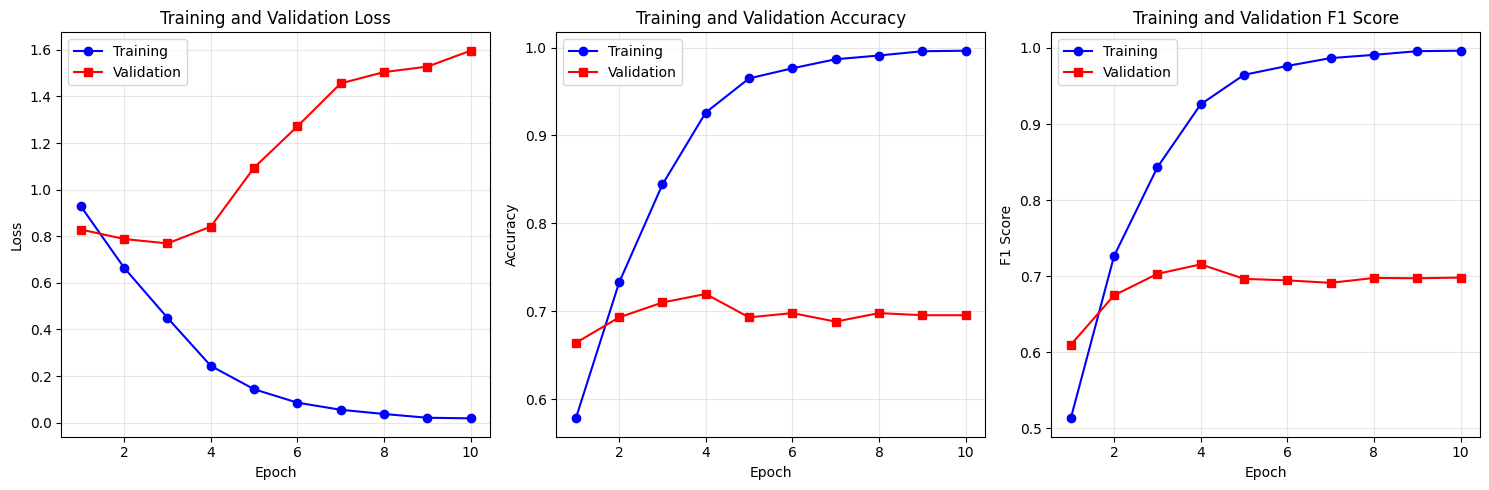

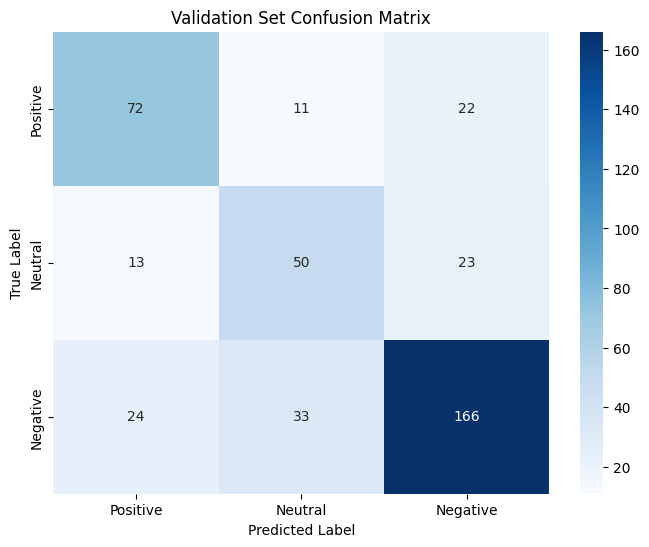

In [ ]:
# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, epochs+1), train_losses, 'b-', label='Training', marker='o')
plt.plot(range(1, epochs+1), val_losses, 'r-', label='Validation', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(range(1, epochs+1), train_accuracies, 'b-', label='Training', marker='o')
plt.plot(range(1, epochs+1), val_accuracies, 'r-', label='Validation', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(range(1, epochs+1), train_f1_scores, 'b-', label='Training', marker='o')
plt.plot(range(1, epochs+1), val_f1_scores, 'r-', label='Validation', marker='s')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('Training and Validation F1 Score')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
plt.show()

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(val_labels, val_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[label_names[i] for i in sorted(label_names.keys())],
            yticklabels=[label_names[i] for i in sorted(label_names.keys())])
plt.title('Validation Set Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
output_dir = './darija_sentiment_model/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save model and tokenizer
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Save training results
results = {
    'best_val_f1': float(best_val_f1),
    'training_time': training_time,
    'epochs': epochs,
    'batch_size': batch_size,
    'learning_rate': learning_rate,
    'model_name': model_name,
    'num_labels': num_labels,
    'label_names': label_names
}

import json
with open(os.path.join(output_dir, 'training_results.json'), 'w', encoding='utf-8') as f:
    json.dump(results, f, ensure_ascii=False, indent=2)

print(f"✅ Model saved to {output_dir}")
print("📁 Saved files:")
print("  - pytorch_model.bin (model weights)")
print("  - config.json (model configuration)")
print("  - tokenizer files")
print("  - training_results.json (training summary)")


✅ Model saved to ./darija_sentiment_model/
📁 Saved files:
  - pytorch_model.bin (model weights)
  - config.json (model configuration)
  - tokenizer files
  - training_results.json (training summary)


In [ ]:
def predict_sentiment(text, model, tokenizer, device, label_names):
    """
    Predict sentiment for a given text

    Args:
        text (str): Input text
        model: Trained model
        tokenizer: Tokenizer
        device: Computing device
        label_names (dict): Mapping of label indices to names

    Returns:
        dict: Prediction results
    """
    model.eval()

    # Tokenize
    encoding = tokenizer(
        text,
        add_special_tokens=True,
        max_length=128,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )

    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        probabilities = torch.nn.functional.softmax(logits, dim=1)

        pred_label = torch.argmax(logits, dim=1).cpu().item()
        confidence = probabilities[0][pred_label].cpu().item()

    return {
        'text': text,
        'predicted_label': pred_label,
        'predicted_sentiment': label_names[pred_label],
        'confidence': confidence,
        'all_probabilities': {label_names[i]: prob.item() for i, prob in enumerate(probabilities[0])}
    }

# Example predictions
example_texts = [
    "كتب حلو بزاف",  # Very nice book
    "ما عجبنيش هاد الفيلم",  # I didn't like this movie
    "واخا",  # Okay/Whatever
    "S9sini",  # Excellent
]

print("🔮 EXAMPLE PREDICTIONS:")
print("-" * 50)

for text in example_texts:
    result = predict_sentiment(text, model, tokenizer, device, label_names)
    print(f"Text: {result['text']}")
    print(f"Prediction: {result['predicted_sentiment']} (confidence: {result['confidence']:.3f})")
    print(f"All probabilities: {result['all_probabilities']}")
    print("-" * 50)


🔮 EXAMPLE PREDICTIONS:
--------------------------------------------------
Text: كتب حلو بزاف
Prediction: Positive (confidence: 0.997)
All probabilities: {'Positive': 0.9966492056846619, 'Neutral': 0.0021034220699220896, 'Negative': 0.0012474372051656246}
--------------------------------------------------
Text: ما عجبنيش هاد الفيلم
Prediction: Positive (confidence: 0.821)
All probabilities: {'Positive': 0.8205667734146118, 'Neutral': 0.010941353626549244, 'Negative': 0.16849187016487122}
--------------------------------------------------
Text: واخا
Prediction: Positive (confidence: 0.810)
All probabilities: {'Positive': 0.8098495602607727, 'Neutral': 0.183309406042099, 'Negative': 0.006841063965111971}
--------------------------------------------------
Text: S9sini
Prediction: Neutral (confidence: 0.996)
All probabilities: {'Positive': 0.002715690527111292, 'Neutral': 0.9956080317497253, 'Negative': 0.0016762673621997237}
--------------------------------------------------
